In [1]:
# import the important libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np



In [2]:
#uploading the file from the desktop (local machine)
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving SalesOfMedicalDevices.xlsx to SalesOfMedicalDevices.xlsx


In [3]:
df = pd.read_excel('SalesOfMedicalDevices.xlsx')
df

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Customer,year,NoOfSalesCalls,NoOfTargetedEmails,NoOfSales,CustomerSatisfaction
0,1,2009,1,2,3,-1
1,1,2010,1,1,3,-1
2,1,2011,1,2,0,1
3,1,2012,3,2,0,1
4,1,2013,3,3,3,1
...,...,...,...,...,...,...
606,47,2017,1,2,1,1
607,47,2018,0,1,1,1
608,47,2019,3,2,2,1
609,47,2020,5,2,1,1


**Data Preperation**

In [4]:
#check the decoration
df.columns

Index(['Customer', 'year', 'NoOfSalesCalls', 'NoOfTargetedEmails', 'NoOfSales',
       'CustomerSatisfaction'],
      dtype='object')

In [5]:
# Explore the data
print(df.head())
print(df.describe())

   Customer  year  NoOfSalesCalls  NoOfTargetedEmails  NoOfSales  \
0         1  2009               1                   2          3   
1         1  2010               1                   1          3   
2         1  2011               1                   2          0   
3         1  2012               3                   2          0   
4         1  2013               3                   3          3   

   CustomerSatisfaction  
0                    -1  
1                    -1  
2                     1  
3                     1  
4                     1  
         Customer         year  NoOfSalesCalls  NoOfTargetedEmails  \
count  611.000000   611.000000      611.000000          611.000000   
mean    24.000000  2015.000000        1.415712            1.543372   
std     13.575774     3.744723        1.318475            1.136287   
min      1.000000  2009.000000        0.000000            0.000000   
25%     12.000000  2012.000000        0.000000            1.000000   
50%     24.0000

In [6]:
# Visualize the data
#sns.pairplot(df)
#plt.show()

In [7]:
var = list(df.columns)
var

['Customer',
 'year',
 'NoOfSalesCalls',
 'NoOfTargetedEmails',
 'NoOfSales',
 'CustomerSatisfaction']

In [8]:
# variable data types
df.dtypes

Customer                int64
year                    int64
NoOfSalesCalls          int64
NoOfTargetedEmails      int64
NoOfSales               int64
CustomerSatisfaction    int64
dtype: object

In [54]:
#Compute mean, standard deviation, min, max, median, length, and missing values 
print('Mean : ', df.CustomerSatisfaction.mean())
print('Std. dev : ', df.CustomerSatisfaction.std())
print('Min : ', df.CustomerSatisfaction.min())
print('Max : ', df.CustomerSatisfaction.max())
print('Median : ', df.CustomerSatisfaction.median())
print('Length : ', len(df.CustomerSatisfaction))

print('Number of missing values : ', df.CustomerSatisfaction.isnull().sum())

Mean :  -0.12111292962356793
Std. dev :  0.7388933275656746
Min :  -1
Max :  1
Median :  0.0
Length :  611
Number of missing values :  0


In [56]:
#Compute mean, standard dev., min, max, median, length, and missing values for all variables
pd.DataFrame({'mean': df.mean(),
              'sd': df.std(),
              'min': df.min(),
              'max': df.max(),
              'median': df.median(),
              'length': len(df),
              'miss.val': df.isnull().sum(),
             })

,mean,sd,min,max,median,length,miss.val
Customer,24.000000,13.575774,1,47,24.0,611,0
year,15.000000,3.744723,9,21,15.0,611,0
NoOfSalesCalls,1.415712,1.318475,0,5,1.0,611,0
NoOfTargetedEmails,1.543372,1.136287,0,3,2.0,611,0
NoOfSales,1.392799,1.331663,0,4,1.0,611,0
CustomerSatisfaction,-0.121113,0.738893,-1,1,0.0,611,0


In [59]:
#see the realtionship between the variables
df.corr().round(2)

,Customer,year,NoOfSalesCalls,NoOfTargetedEmails,NoOfSales,CustomerSatisfaction
Customer,1.00,-0.00,0.07,0.04,0.10,-0.01
year,-0.00,1.00,0.46,0.60,0.02,0.10
NoOfSalesCalls,0.07,0.46,1.00,0.67,0.09,0.02
NoOfTargetedEmails,0.04,0.60,0.67,1.00,0.20,0.01
NoOfSales,0.10,0.02,0.09,0.20,1.00,-0.04
CustomerSatisfaction,-0.01,0.10,0.02,0.01,-0.04,1.00


In [61]:
# See how many classes and count the vlues for each class
df.CustomerSatisfaction.value_counts()

 0    269
-1    208
 1    134
Name: CustomerSatisfaction, dtype: int64

In [63]:
# Use the groupby and get the mean
df.groupby(['year', 'NoOfTargetedEmails'])['NoOfSalesCalls'].mean()

year  NoOfTargetedEmails
9     0                     0.000000
      1                     1.000000
      2                     1.000000
10    0                     0.000000
      1                     0.941176
      2                     1.000000
11    0                     0.000000
      1                     1.181818
      2                     1.500000
12    0                     0.055556
      1                     1.125000
      2                     2.000000
      3                     1.500000
13    0                     0.000000
      1                     1.066667
      2                     1.142857
      3                     1.833333
14    0                     0.333333
      1                     1.583333
      2                     2.272727
      3                     2.666667
15    0                     0.750000
      1                     1.300000
      2                     2.111111
      3                     2.750000
16    0                     0.600000
      1      

In [64]:
#Use the method `pd.crosstab` for cross tabulation of two variables
tbl = pd.crosstab(df.NoOfSalesCalls, df.CustomerSatisfaction)
propTbl = tbl / tbl.sum()
propTbl.round(2)

CustomerSatisfaction,-1,0,1
NoOfSalesCalls,,,
0,0.22,0.38,0.16
1,0.50,0.26,0.54
2,0.03,0.01,0.02
3,0.22,0.31,0.25
4,0.00,0.01,0.01
5,0.03,0.03,0.02


<ipython-input-65-be9efa79d13b>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])


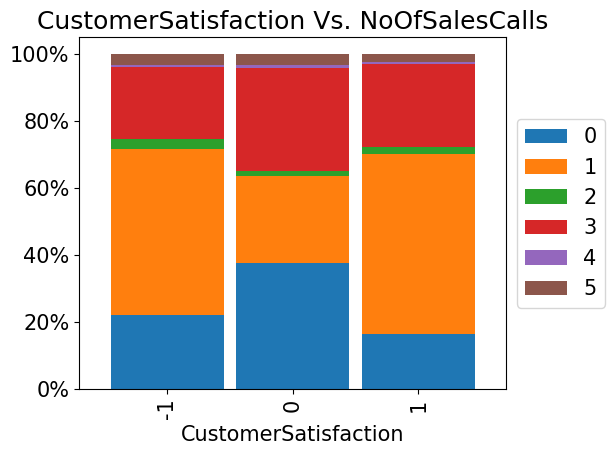

In [65]:
#The dataframe method plot allows creating various graphs. The graph is created using matplotlib and therefore can be further manipulated.
ax = propTbl.transpose().plot(kind='bar', stacked=True, width=0.9)
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
plt.title('CustomerSatisfaction Vs. NoOfSalesCalls')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [66]:
tbl = pd.crosstab(df.NoOfSales, df.CustomerSatisfaction)
propTbl = tbl / tbl.sum()
propTbl.round(2)

CustomerSatisfaction,-1,0,1
NoOfSales,,,
0,0.36,0.41,0.32
1,0.16,0.24,0.23
2,0.06,0.14,0.08
3,0.37,0.17,0.34
4,0.05,0.03,0.02


<ipython-input-67-f9e87e4eb82f>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])


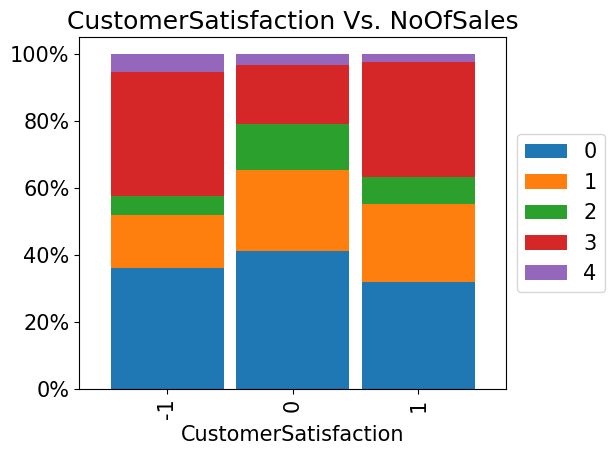

In [67]:
ax = propTbl.transpose().plot(kind='bar', stacked=True, width=0.9)
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
plt.title('CustomerSatisfaction Vs. NoOfSales')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [68]:
tbl = pd.crosstab(df.NoOfTargetedEmails, df.CustomerSatisfaction)
propTbl = tbl / tbl.sum()
propTbl.round(2)

CustomerSatisfaction,-1,0,1
NoOfTargetedEmails,,,
0,0.20,0.34,0.13
1,0.27,0.17,0.33
2,0.25,0.21,0.28
3,0.28,0.28,0.26


<ipython-input-69-af972047fa95>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])


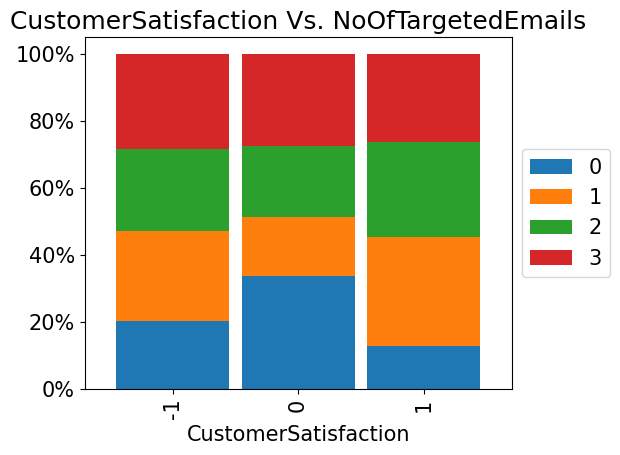

In [69]:
ax = propTbl.transpose().plot(kind='bar', stacked=True, width=0.9)
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
plt.title('CustomerSatisfaction Vs. NoOfTargetedEmails')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

**Histigram**

<Axes: >

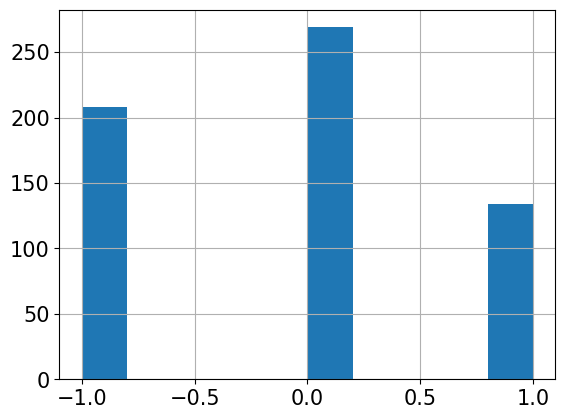

In [70]:
df['CustomerSatisfaction'].hist()

<Axes: >

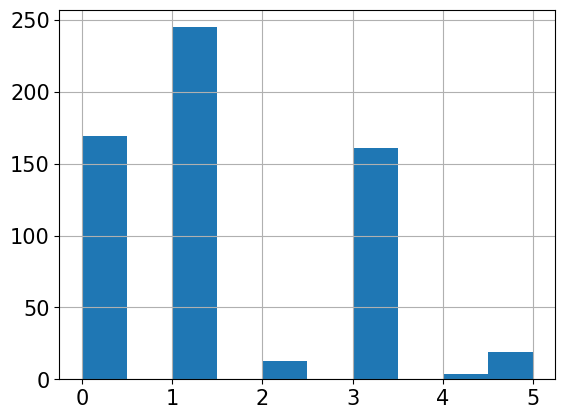

In [71]:
df['NoOfSalesCalls'].hist()

<Axes: >

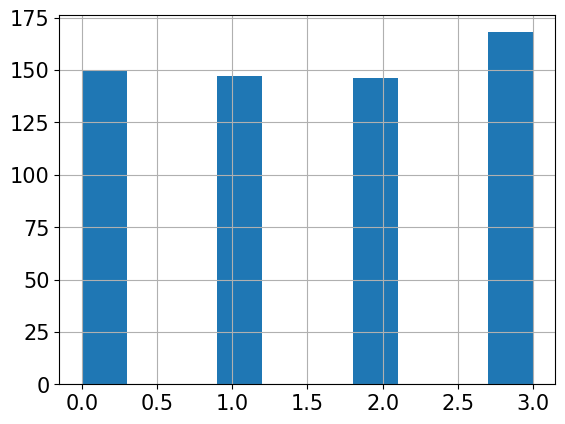

In [72]:
df['NoOfTargetedEmails'].hist()

<Axes: >

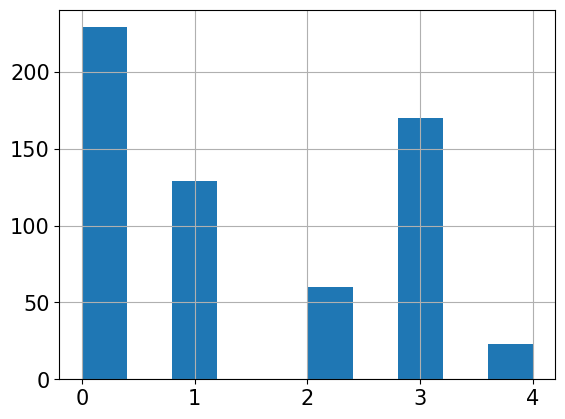

In [73]:
df['NoOfSales'].hist()

In [74]:
df['CustomerSatisfaction'].value_counts(normalize=True)

 0    0.440262
-1    0.340426
 1    0.219313
Name: CustomerSatisfaction, dtype: float64

**iloc**

In [75]:
df.iloc[:, :4]

,Customer,year,NoOfSalesCalls,NoOfTargetedEmails
0,1,9,1,2
1,1,10,1,1
2,1,11,1,2
3,1,12,3,2
4,1,13,3,3
...,...,...,...,...
606,47,17,1,2
607,47,18,0,1
608,47,19,3,2
609,47,20,5,2


# **Vosualizing Using PCA Method**

In [53]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pylab as plt

In [76]:
# PCA

pcs = PCA()
pcs.fit(df.iloc[:, :4].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4
Standard deviation,13.5762,3.8669,1.2806,0.6696
Proportion of variance,0.9154,0.0743,0.0081,0.0022
Cumulative proportion,0.9154,0.9896,0.9978,1.0000


<Axes: >

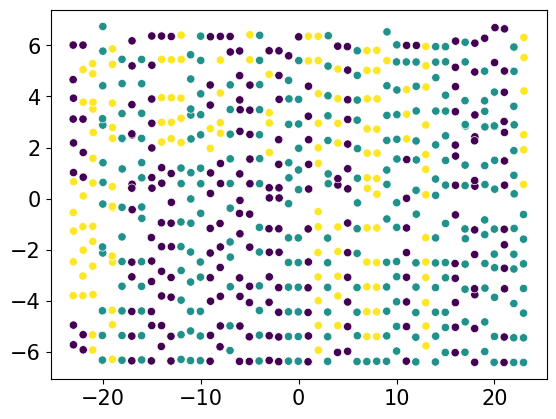

In [77]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(df)

pc1_values = pcs[:,0]
pc2_values = pcs[:,1]
sns.scatterplot(x=pc1_values, y=pc2_values, c=df['CustomerSatisfaction'])

In [78]:
CustAndNoOfSales = df[['NoOfSales', 'CustomerSatisfaction']]
CustAndNoOfSales

,NoOfSales,CustomerSatisfaction
0,3,-1
1,3,-1
2,0,1
3,0,1
4,3,1
...,...,...
606,1,1
607,1,1
608,2,1
609,1,1


**Using Cluster (K-Means) Method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

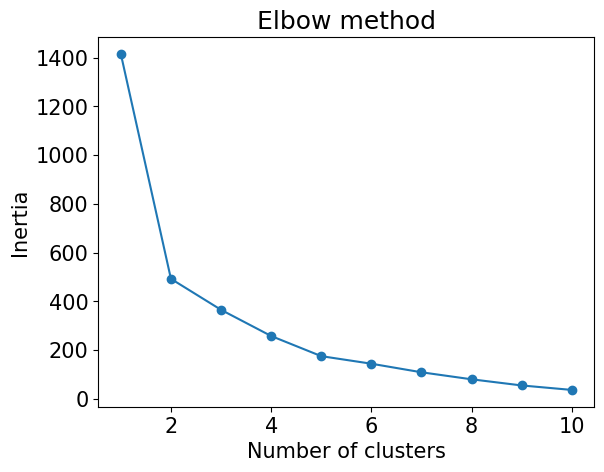

In [79]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(CustAndNoOfSales)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


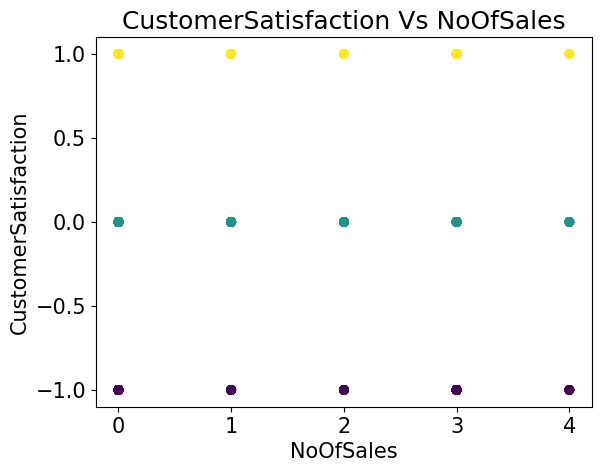

In [80]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(CustAndNoOfSales)

plt.scatter(CustAndNoOfSales['NoOfSales'], CustAndNoOfSales['CustomerSatisfaction'], c=CustAndNoOfSales['CustomerSatisfaction'])
plt.xlabel("NoOfSales")
plt.ylabel("CustomerSatisfaction")
plt.title("CustomerSatisfaction Vs NoOfSales")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


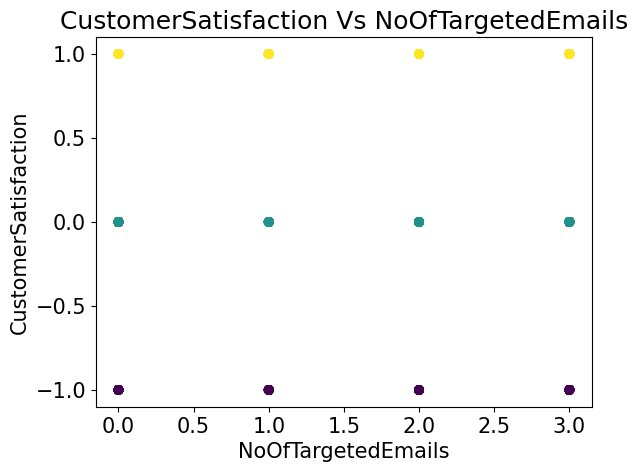

In [81]:
CustAndNoOfTargetedEmails = df[['NoOfTargetedEmails', 'CustomerSatisfaction']]

kmeans = KMeans(n_clusters=2)
kmeans.fit(CustAndNoOfTargetedEmails)

plt.scatter(CustAndNoOfTargetedEmails['NoOfTargetedEmails'], CustAndNoOfTargetedEmails['CustomerSatisfaction'], c=CustAndNoOfTargetedEmails['CustomerSatisfaction'])
plt.xlabel("NoOfTargetedEmails")
plt.ylabel("CustomerSatisfaction")
plt.title("CustomerSatisfaction Vs NoOfTargetedEmails")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


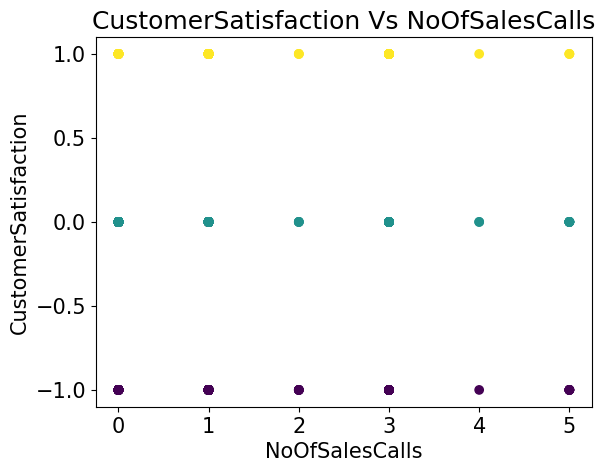

In [82]:
CustAndNoOfSalesCalls = df[['NoOfSalesCalls', 'CustomerSatisfaction']]

kmeans = KMeans(n_clusters=2)
kmeans.fit(CustAndNoOfSalesCalls)

plt.scatter(CustAndNoOfSalesCalls['NoOfSalesCalls'], CustAndNoOfSalesCalls['CustomerSatisfaction'], c=CustAndNoOfSalesCalls['CustomerSatisfaction'])
plt.xlabel("NoOfSalesCalls")
plt.ylabel("CustomerSatisfaction")
plt.title("CustomerSatisfaction Vs NoOfSalesCalls")
plt.show()

In [21]:
# Preprocess the data
#in this case, we do not have any null
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Customer,0,0.0
year,0,0.0
NoOfSalesCalls,0,0.0
NoOfTargetedEmails,0,0.0
NoOfSales,0,0.0
CustomerSatisfaction,0,0.0


<Axes: >

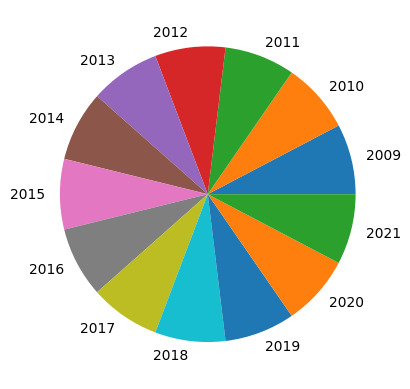

In [23]:
# graph the years to see if they are equal or not using pie
grp = df.groupby(['year'])
grp.size()
grp=df.groupby("year")
grp.size().plot(kind='pie')

NoOfSalesCalls
0    169
1    245
2     13
3    161
4      4
5     19
dtype: int64


<Axes: >

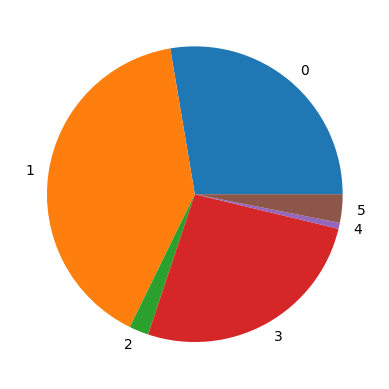

In [24]:
# graph the years to see if they are equal or not using pie
# in this feature, we can see class 1 has more calls vs other 
grp = df.groupby(['NoOfSalesCalls'])
print(grp.size())
grp=df.groupby("NoOfSalesCalls")
grp.size().plot(kind='pie')

NoOfTargetedEmails
0    150
1    147
2    146
3    168
dtype: int64


<Axes: >

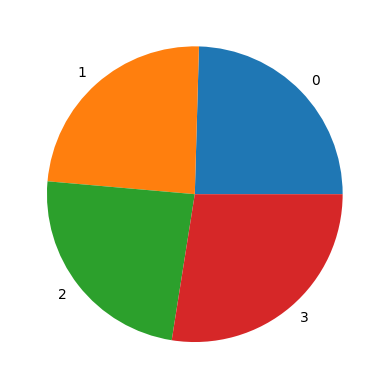

In [25]:
# graph the years to see if they are equal or not using pie
# in this feature, we can see classes are more likely to be close to each others 
grp = df.groupby(['NoOfTargetedEmails'])
print(grp.size())
grp=df.groupby("NoOfTargetedEmails")
grp.size().plot(kind='pie')

NoOfSales
0    229
1    129
2     60
3    170
4     23
dtype: int64


<Axes: >

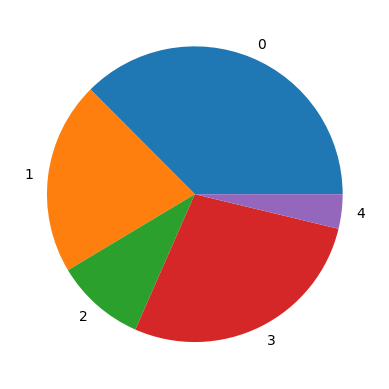

In [26]:
# graph the years to see if they are equal or not using pie
# in this feature, we can see class 0 has more sales vs other 
grp = df.groupby(['NoOfSales'])
print(grp.size())
grp=df.groupby("NoOfSales")
grp.size().plot(kind='pie')

In [27]:
# use groupby to compain NoOfTargetedEmails for each of the classes
# for each class to see how mauch the data are skewed
grp = df.groupby(['CustomerSatisfaction','NoOfTargetedEmails']).size()
grp

CustomerSatisfaction  NoOfTargetedEmails
-1                    0                     42
                      1                     56
                      2                     51
                      3                     59
 0                    0                     91
                      1                     47
                      2                     57
                      3                     74
 1                    0                     17
                      1                     44
                      2                     38
                      3                     35
dtype: int64

In [28]:
# use groupby to compain NoOfSalesCalls for each of the classes
# for each class to see how mauch the data are skewed
grp = df.groupby(['CustomerSatisfaction','NoOfSalesCalls']).size()
grp

CustomerSatisfaction  NoOfSalesCalls
-1                    0                  46
                      1                 103
                      2                   6
                      3                  45
                      4                   1
                      5                   7
 0                    0                 101
                      1                  70
                      2                   4
                      3                  83
                      4                   2
                      5                   9
 1                    0                  22
                      1                  72
                      2                   3
                      3                  33
                      4                   1
                      5                   3
dtype: int64

In [29]:
# Preprocess the data
X = df.copy().drop(["CustomerSatisfaction"], axis = 1)
y = df.copy()["CustomerSatisfaction"]

print(X.shape)
print(y.shape)

(611, 5)
(611,)


<Axes: >

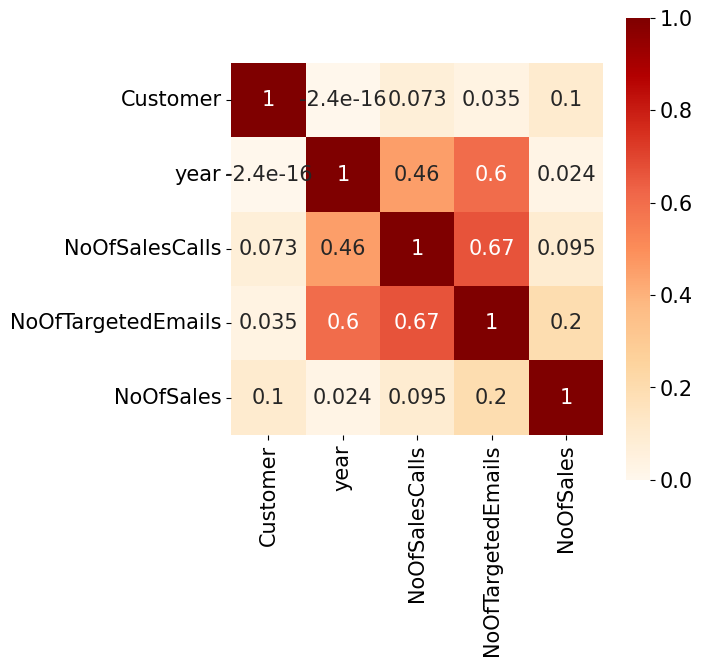

In [49]:
# find the best corr where the data is independing 
# we find the relation between (NoOfSales) and (Customer), a strong relationship which is 0.1
# we find the relation between NoOfTargetedEmails and (NoOfSales), a strong relationship which is 0.1
corr = X.corr()
cmap = sns.color_palette("OrRd", as_cmap=True)
plt.figure(figsize=(6, 6))
sns.heatmap(corr, mask=None, cmap=cmap, square=True, annot=True)

Text(0.5, 1.0, 'Satisfaction Distribution')

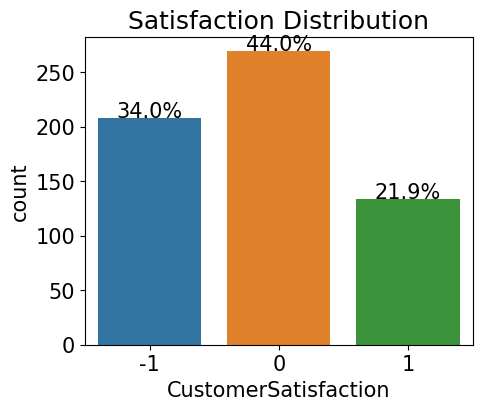

In [31]:
# find/graph the satisfaction distribution for each class in the column (CustomerSatisfaction)
def write_percent(ax,total_size):
    
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height/total_size*100
        
        ax.text(left_coord+ width/2.0,
               height + total_size*0.001,
               '{:1.1f}%'.format(percent),
               ha='center')
        
mpl.rc('font',size=15)
plt.figure(figsize=(5,4))

ax = sns.countplot(x='CustomerSatisfaction',data=df)
write_percent(ax,len(df))
ax.set_title('Satisfaction Distribution')

In [32]:
df['year'] = df.year.apply(lambda x: x%100)
df

,Customer,year,NoOfSalesCalls,NoOfTargetedEmails,NoOfSales,CustomerSatisfaction
0,1,9,1,2,3,-1
1,1,10,1,1,3,-1
2,1,11,1,2,0,1
3,1,12,3,2,0,1
4,1,13,3,3,3,1
...,...,...,...,...,...,...
606,47,17,1,2,1,1
607,47,18,0,1,1,1
608,47,19,3,2,2,1
609,47,20,5,2,1,1


In [33]:
# Preprocess the data
X = df.drop('CustomerSatisfaction', axis=1)
y = df['CustomerSatisfaction']

# Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [34]:
X_train.shape ,y_train.shape

((488, 5), (488,))

In [36]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=[cmap(idx)],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)# plot decision regions for training set




In [38]:
# Create an instance of Pipeline
# we have validatiob accuracy for each classes, and cross validation accuracy on avarage
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds

strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    
    pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Accuracy: %.3f' % (k+1, score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Accuracy: 0.694
Fold:  2, Accuracy: 0.714
Fold:  3, Accuracy: 0.633
Fold:  4, Accuracy: 0.755
Fold:  5, Accuracy: 0.653
Fold:  6, Accuracy: 0.694
Fold:  7, Accuracy: 0.653
Fold:  8, Accuracy: 0.694
Fold:  9, Accuracy: 0.625
Fold: 10, Accuracy: 0.646


Cross-Validation accuracy: 0.676 +/- 0.039


In [39]:
#construct baseline pipeline
#AUC
pipe_rf = RandomForestClassifier(random_state=123)

In [40]:
#fit the model
model = pipe_rf.fit(X_train, y_train)

In [41]:
#predict on the model
y_score = model.predict_proba(X_test)
y_score

array([[0.44, 0.53, 0.03],
       [0.04, 0.65, 0.31],
       [0.49, 0.5 , 0.01],
       [0.91, 0.04, 0.05],
       [0.05, 0.43, 0.52],
       [0.24, 0.14, 0.62],
       [0.17, 0.59, 0.24],
       [0.15, 0.68, 0.17],
       [0.33, 0.52, 0.15],
       [0.72, 0.27, 0.01],
       [0.03, 0.82, 0.15],
       [0.44, 0.44, 0.12],
       [0.29, 0.25, 0.46],
       [0.37, 0.08, 0.55],
       [0.11, 0.63, 0.26],
       [0.73, 0.03, 0.24],
       [0.89, 0.08, 0.03],
       [0.23, 0.35, 0.42],
       [0.28, 0.19, 0.53],
       [0.25, 0.75, 0.  ],
       [0.38, 0.35, 0.27],
       [0.78, 0.12, 0.1 ],
       [0.62, 0.08, 0.3 ],
       [0.26, 0.02, 0.72],
       [0.89, 0.07, 0.04],
       [0.4 , 0.38, 0.22],
       [0.3 , 0.07, 0.63],
       [0.83, 0.17, 0.  ],
       [0.76, 0.15, 0.09],
       [0.61, 0.32, 0.07],
       [0.2 , 0.5 , 0.3 ],
       [0.5 , 0.09, 0.41],
       [0.05, 0.68, 0.27],
       [0.81, 0.13, 0.06],
       [0.3 , 0.69, 0.01],
       [0.4 , 0.5 , 0.1 ],
       [0.06, 0.6 , 0.34],
 

In [42]:
#Binarize the output
y_test_bin = label_binarize(y_test, classes=[-1,0,1])
n_classes = y_test_bin.shape[1]

AUC for Class 1: 0.8253012048192772
AUC for Class 2: 0.8125335480407944
AUC for Class 3: 0.886463683052091


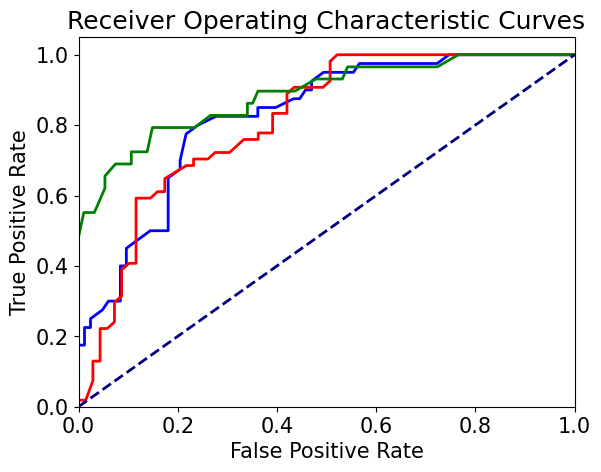

In [43]:
#AUC for 3 classes
# we can see the green line present the best, which is class 1 
fpr = dict()
tpr = dict()
roc_auc = dict()
colors = ['blue', 'red', 'green']
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], color=colors[i], lw=2)
  print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

In [44]:
# get the report for the classes
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.61      0.70      0.65        40
           0       0.69      0.70      0.70        54
           1       0.77      0.59      0.67        29

    accuracy                           0.67       123
   macro avg       0.69      0.66      0.67       123
weighted avg       0.68      0.67      0.68       123

